<img src="tpan1.png">

###### Réaliser par : 
#### *** ibtissem BOUZIDI 2 DNI 1 ***


* **<i><span style="color:#0000C0">Quelques rappels sur les étapes de la numérisation d'un signal: </span>**
La numérisation consiste à transformer un signal analogique qui contient une quantité infinie d'amplitudes en un signal numérique contenant, lui, une quantité finie de valeurs.</i>
<p>Le passage de l'analogique au numérique repose sur trois étapes successives :</p>
* <span style="color:orange"><strong>l'échantillonnage</strong></span>
* <span style="color:orange"><strong>quantification</strong></span>
* <span style="color:orange"><strong>le codage</strong></span>

<h2 style="color:black" >l'échantillonnage:</h2>

>consiste à prélever les valeurs d'un signal à intervalles définis, généralement réguliers. Il produit une suite de valeurs discrètes nommées échantillons.

In [86]:
'''IMPORTATION DES BEBLIOTHEQUES'''
import math 
from math import *
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from dec2bin import *
import math
import warnings
warnings.filterwarnings('ignore')

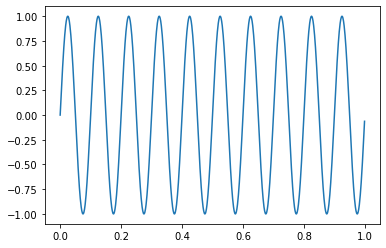

In [87]:
f=10
fe=1000
te=1/fe
t=arange(0,1,te)
s=[sin(2*pi*f*i)for i in t]
plt.plot(t,s)
plt.show()


 <div class="alert alert-block alert-warning"> <span style="color:#800000">→ Lors de la phase d’échantillonnage, il y a risque de perte d’information. Shannon a donné une condition pour ne pas perdre d’information dans un signal <i>(théorème de Shannon)</i> :
<br>** La fréquence d’échantillonnage doit être au moins égale au double de la fréquence maximale du signal analogique .</span>** </div>


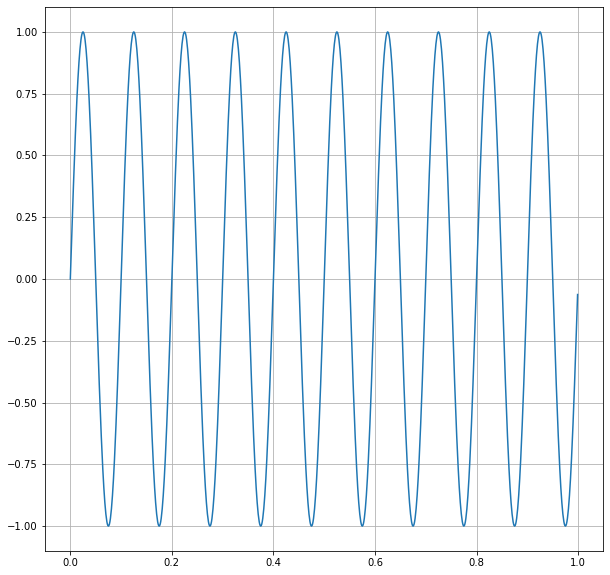

In [98]:
f=10
fe=1000
te=1/fe
t=arange(0,1,te)
s=[sin(2*pi*f*i)for i in t]
figure=plt.figure(figsize=[10,10])
plt.grid(True)
plt.plot(t,s)
plt.show()


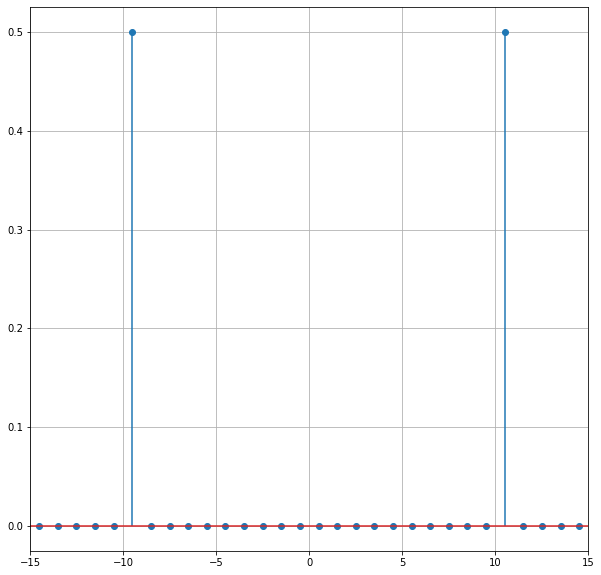

In [99]:
'''nombre des points'''
N=len(t)
'''Effectuer le transformer de Fourier inverse'''
sff=np.fft.fftshift(np.fft.fft(s))
sf=sff/N
f=np.linspace(-fe/2,fe/2,N)
figure=plt.figure(figsize=[10,10])
plt.grid(True)
axis=figure.add_subplot(111)
axis.set_xlim(-15,15)
'''Afficher s(f) le spectre de signial s(t)'''
plt.stem(f,abs(sf))
plt.show()

<h2 style="color:black" >Quantification:</h2>

>Un signal numérique ne peut prendre que certaines valeurs : c’est la <i>quantification</i>, assurée par un convertisseur analogique-numérique (C.A.N.). Chaque valeur est arrondie à la valeur permise la plus proche par défaut.

In [100]:
fe = 1000
te = 1/fe
f=10
t=arange(0,1,te)
n = 3
s=[sin(2*pi*f*i)for i in t]

 <div class="alert alert-info" role="alert"> → On appelle résolution l’écart (constant) entre deux valeurs permises successives. On rencontre aussi le pas. La résolution pas d’un convertisseur analogique/numérique de n bits travaillant sur un domaine en tension électrique  est donnée par :** </div>
    
$$pas=\displaystyle{\frac{U_{max}-U_{max}}{2^n}}$$
En effet, avec $n$ bits, il est possible de coder $2^n$ valeurs différentes, donc on divise la longueur du domaine $U_{max}-U_{max}$ par le nombre de valeurs possibles. 


In [101]:
'''determiner la valeur min et max du signal '''
smin=np.amin(s)
smax=np.amax(s)
'''calculer du pas 'pas' et amplitude 'amp' du signal quantifié'''
pas=(smax-smin)/(2**n)
amp=floor((s-smin)/pas)
'''calculer séquence quantifié 'seq' '''
seq=smin+pas*amp+(pas/2)
for i in range(n):
    if (seq[i] >= smax):
        seq[i]=smax-(pas/2)

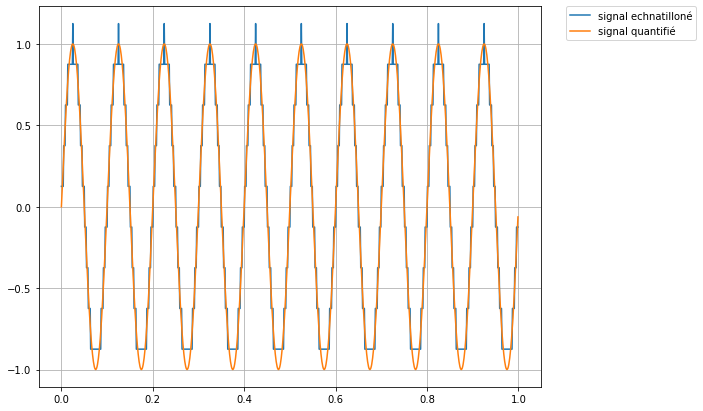

In [102]:
figure=plt.figure(figsize=[9,7])
plt.plot(t,seq,label="signal echnatilloné")
plt.plot(t,s,label="signal quantifié")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

<h2 style="color:black" >Le codage:</h2>

>Dans la pratique, le signal numérisé  n’est pas transmis en l’état. Il est en effet codé en binaire. Cela constitue la dernière étape de la conversion analogique-numérique. Comme vu, le binaire travaille uniquement avec deux chiffres : 0 et 1. Un nombre binaire est un groupement de chiffres binaires (bits).

In [103]:
fe = 1000
te = 1/fe
f=10
t=arange(0,1,te)
n = 3

In [104]:
s=[sin(2*pi*f*i)for i in t]
smin=np.amin(s)
smax=np.amax(s)
pas=(smax-smin)/(2**n)
quan=floor((s-smin)/pas)

seq=smin+pas*quan+(pas/2)
for i in range(1,len(sq)):
    if (seq[i] >= smax):
        seq[i]=smax-(pas/2)

In [105]:
''' converssion de la valuer numérique du niveau de quantification à un nombre binaire (0/1)'''
code= []
for i in range(len(quan)):
    code.append(dec2bin(int(quan[i])))
print(code)

['100', '100', '100', '100', '100', '101', '101', '101', '101', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '1000', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '110', '110', '110', '101', '101', '101', '101', '100', '100', '100', '100', '100', '11', '11', '11', '11', '10', '10', '10', '10', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '10', '10', '10', '10', '11', '11', '11', '11', '11', '100', '100', '100', '100', '101', '101', '101', '101', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '1000', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '110', '110', '110', '101', '101', '101', '101', '100', '100', '100', '100', '100', '11', '11', '11', '11',

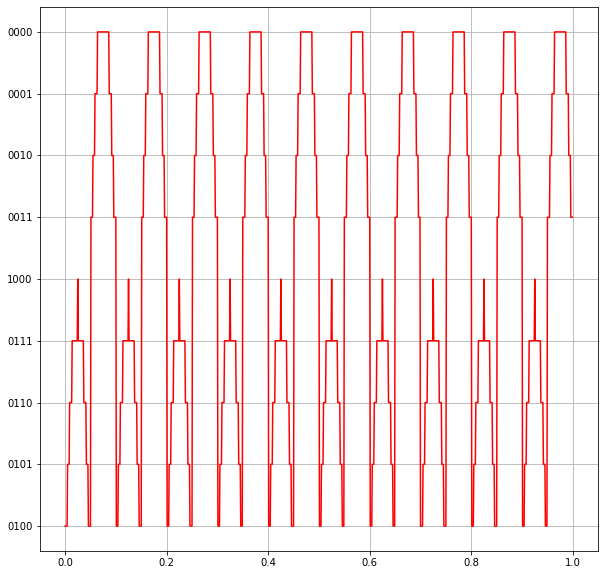

In [106]:
figure=plt.figure(figsize=[10,10])
plt.plot(t,b,'r')
plt.grid(True)
plt.show()

<h2 style="color:black" >Conclusion:</h2>

>La conversion d’un signal analogique en signal numérique correspond à 3 étapes :
>* <span style="color:orange"><strong>l'échantillonnage:</strong></span>la valeur du signal n’est mesurée que périodiquement. Le temps entre deux mesures consécutives est la <strong>période d’échantillonnage</strong> $T_e$, son inverse est la <strong>fréquence d’échantillonnage </strong>$F_e$. Celle-ci doit être au moins deux fois plus grande que la fréquence la plus forte $F_{max}$ , selon le <strong>théorème de Shannon</strong>.

>*  <strong><span style="color:orange">Quantification:</span></strong> les valeurs mesurées sont arrondies, afin que le signal numérisé ne prenne qu’un nombre fini de valeurs différentes. Pour un convertisseur analogique-numérique (C.A.N.) n bits travaillant sur un domaine en tension $]U_{min},U_{max}[$ , la résolution pas du convertisseur est $pas=\displaystyle{\frac{U_{max}-U_{max}}{2^n}}$. C’est l’écart entre deux valeurs permises consécutives.

>* <strong><span style="color:orange">Codage:</span></strong>Pour sa transmission, le signal numérisé est codé en binaire, c'est-à-dire en <strong>base 2</strong>. Un nombre binaire est composé de chiffres binaires, les bits (0 ou 1).